# 疫情数据分析

[这份数据是 Kaggle 上的公开数据集](https://www.kaggle.com/datasets/imdevskp/corona-virus-report/version/166)

strip() 函数用于移除字符串两端的空白字符，包括空格、换行符、制表符等。

split(",") 函数用于将一个字符串按照指定的分隔符（在这里是逗号 ,）拆分成多个子字符串，返回一个列表。

或者 我们可以用 pandas 库读取数据集，并对数据进行预处理。


In [2]:
with open("covid19_day_wise.csv", "r", encoding="utf-8") as f:
    data = f.readlines()

covid = {
    "date": [],
    "data": [],
    "header": [h for h in data[0].strip().split(",")[1:]]   
}
for row in data[1:]:    #遍历 CSV 文件中的每一行数据（从第二行开始，因为第一行是标题）
    split_row = row.strip().split(",")      #去掉当前行两端的空白符并通过逗号 , 分割成列表
    covid["date"].append(split_row[0])       #第一列是日期
    covid["data"].append([float(n) for n in split_row[1:]])     #从第二列开始，每一列数据都转化为浮点数

### 获取某日数据
获取 2020 年 2 月 3 日的所有数据

In [3]:
print("日期列表摘取：", covid["date"][:4])  #我们用来索引的大概率是数字， 所以我们得搞清楚对应的数字标号是什么 "2020-02-03"

date_idx = covid["date"].index("2020-02-03")    #通过列表的 .index("xxx") 功能来获取到它的索引位置
print("日期->索引转换：", date_idx)

import numpy as np
data = np.array(covid["data"])

for header, number in zip(covid["header"], data[date_idx]):
    print(header, ":", number)


日期列表摘取： ['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25']
日期->索引转换： 12
Confirmed : 19887.0
Deaths : 426.0
Recovered : 604.0
Active : 18857.0
New cases : 3100.0
New deaths : 64.0
New recovered : 145.0
Deaths / 100 Cases : 2.14
Recovered / 100 Cases : 3.04
Deaths / 100 Recovered : 70.53
No. of countries : 25.0


### 累计确诊

2020 年 1 月 24 日之前的累积确诊病例有多少个？

In [4]:
row_idx = covid["date"].index("2020-01-24")   # 获取日期索引
column_idx = covid["header"].index("Confirmed") # 获取标题的索引
confirmed0124 = data[row_idx, column_idx]
print("截止 1 月 24 日的累积确诊数：", confirmed0124)

截止 1 月 24 日的累积确诊数： 941.0


### 总增长数

从 1 月 25 日到 7 月 22 日，一共增长了多少确诊病例？

In [5]:
row1_idx = covid["date"].index("2020-01-25")
row2_idx = covid["date"].index("2020-07-22")
new_cases_idx = covid["header"].index("New cases")

# 注意要 row1_idx+1 得到从 01-25 这一天的新增
# row2_idx+1 来包含 7 月 22 的结果
new_cases = data[row1_idx+1: row2_idx+1, new_cases_idx]
overall = new_cases.sum()
print("共新增：", overall)

共新增： 15247309.0


### 确诊恢复比例

每天新增确诊数和新恢复数的比例？平均比例，标准差各是多少？

In [6]:
new_cases_idx = covid["header"].index("New cases")
new_recovered_idx = covid["header"].index("New recovered")

# 比例
not_zero_mask = data[:, new_recovered_idx] != 0
ratio = data[not_zero_mask, new_cases_idx] / data[not_zero_mask, new_recovered_idx] 
#在 NumPy 中，除法运算符 / 应用于两个数组时，默认情况下会执行点除操作。同理 * 运算符默认执行的是矩阵的点乘

print("比例样本：", ratio[:5])
# 平均比例, 标准差
ratio_mean = ratio.mean()
ratio_std = ratio.std()
print("平均比例：", ratio_mean, "；标准差：", ratio_std)


比例样本： [ 49.5         47.83333333 164.33333333  52.61538462  89.88888889]
平均比例： 7.049556348053241 ；标准差： 19.094025710450307


### 可视化数据

画图展示新增确诊的变化曲线

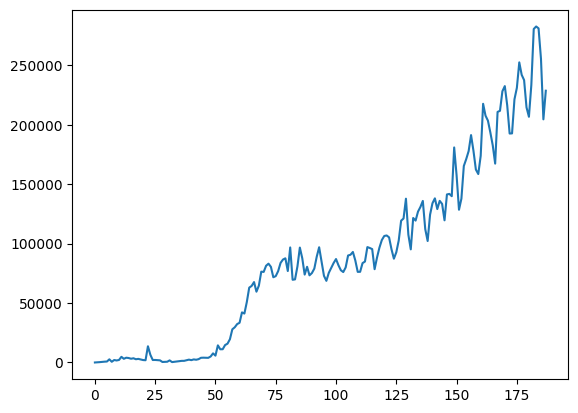

In [7]:

import numpy as np
import matplotlib.pyplot as plt

def draw_line(x):
    plt.plot(x)
    plt.show()

new_cases_idx = covid["header"].index("New cases")
draw_line(data[:, new_cases_idx])

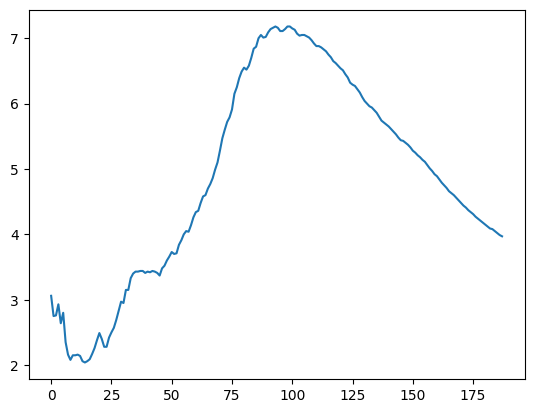

In [8]:
#画图展示死亡率的变化曲线

death_ratio_idx = covid["header"].index("Deaths / 100 Cases")
draw_line(data[:, death_ratio_idx])